<a href="https://colab.research.google.com/github/adityaka8543/appliedstats/blob/master/Econ491HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset (1).csv")
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [ ]:
df.shape

(789, 127)

In [ ]:
for col in df.columns:
  print(col)

sasdate
RPI
W875RX1
DPCERA3M086SBEA
CMRMTSPLx
RETAILx
INDPRO
IPFPNSS
IPFINAL
IPCONGD
IPDCONGD
IPNCONGD
IPBUSEQ
IPMAT
IPDMAT
IPNMAT
IPMANSICS
IPB51222S
IPFUELS
CUMFNS
HWI
HWIURATIO
CLF16OV
CE16OV
UNRATE
UEMPMEAN
UEMPLT5
UEMP5TO14
UEMP15OV
UEMP15T26
UEMP27OV
CLAIMSx
PAYEMS
USGOOD
CES1021000001
USCONS
MANEMP
DMANEMP
NDMANEMP
SRVPRD
USTPU
USWTRADE
USTRADE
USFIRE
USGOVT
CES0600000007
AWOTMAN
AWHMAN
HOUST
HOUSTNE
HOUSTMW
HOUSTS
HOUSTW
PERMIT
PERMITNE
PERMITMW
PERMITS
PERMITW
ACOGNO
AMDMNOx
ANDENOx
AMDMUOx
BUSINVx
ISRATIOx
M1SL
M2SL
M2REAL
BOGMBASE
TOTRESNS
NONBORRES
BUSLOANS
REALLN
NONREVSL
CONSPI
S&P 500
S&P div yield
S&P PE ratio
FEDFUNDS
CP3Mx
TB3MS
TB6MS
GS1
GS5
GS10
AAA
BAA
COMPAPFFx
TB3SMFFM
TB6SMFFM
T1YFFM
T5YFFM
T10YFFM
AAAFFM
BAAFFM
TWEXAFEGSMTHx
EXSZUSx
EXJPUSx
EXUSUKx
EXCAUSx
WPSFD49207
WPSFD49502
WPSID61
WPSID62
OILPRICEx
PPICMM
CPIAUCSL
CPIAPPSL
CPITRNSL
CPIMEDSL
CUSR0000SAC
CUSR0000SAD
CUSR0000SAS
CPIULFSL
CUSR0000SA0L2
CUSR0000SA0L5
PCEPI
DDURRG3M086SBEA
DNDGRG3M086SBEA
DSERRG

# Question 1

###1a

In [ ]:
df_1 = df[["sasdate", "RPI", "HWI", "HOUST", "DPCERA3M086SBEA", "M1SL", "FEDFUNDS", "WPSFD49207", "S&P 500"]]
transformation_codes = df_1.iloc[0, 1:].to_dict()
df_1 = df_1.drop(index= 0)
df_1["sasdate"] = pd.to_datetime(df_1["sasdate"])
df_1.set_index("sasdate", inplace= True)
df_1.head()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M1SL,FEDFUNDS,WPSFD49207,S&P 500
sasdate,,,,,,,,
1959-01-01,2583.560,1357.0,1657,15.188,138.9,2.48,33.1,55.62
1959-02-01,2593.596,1421.0,1667,15.346,139.4,2.43,33.2,54.77
1959-03-01,2610.396,1524.0,1620,15.491,139.7,2.80,33.2,56.16
1959-04-01,2627.446,1589.0,1590,15.435,139.7,2.96,33.2,57.10
1959-05-01,2642.720,1655.0,1498,15.622,140.7,2.90,33.3,57.96


In [ ]:
def transformations(series, code):
  if code == 1:
    return series
  if code == 2:
    return series.diff()
  if code == 3:
    return series.diff().diff()
  if code == 4:
    return np.log(series)
  if code == 5:
    return np.log(series).diff()
  if code == 6:
    return np.log(series).diff().diff()
  if code == 7:
    return series.pct_change()
  else:
    return series


df_transformed = pd.DataFrame(index = df_1.index)

for variable, code in transformation_codes.items():
  df_transformed[variable] = transformations(df_1[variable].astype(float), code)



#df_transformed.dropna(inplace= True)
df_transformed.index = pd.to_datetime(df_transformed.index)
df_transformed_EightVars = df_transformed[["RPI", "HWI", "HOUST", "DPCERA3M086SBEA", "M1SL", "FEDFUNDS", "WPSFD49207", "S&P 500"]]
df_transformed_dropped = df_transformed.dropna()
df_transformed.head()


,RPI,HWI,HOUST,DPCERA3M086SBEA,M1SL,FEDFUNDS,WPSFD49207,S&P 500
sasdate,,,,,,,,
1959-01-01,NaN,NaN,7.412764,NaN,NaN,NaN,NaN,NaN
1959-02-01,0.003877,64.0,7.418781,0.010349,NaN,-0.05,NaN,-0.015400
1959-03-01,0.006457,103.0,7.390181,0.009404,-0.001443,0.37,-0.003017,0.025062
1959-04-01,0.006510,65.0,7.371489,-0.003622,-0.002150,0.16,0.000000,0.016599
1959-05-01,0.005796,66.0,7.311886,0.012043,0.007133,-0.06,0.003008,0.014949


In [ ]:
##Before

#plt.plot(df.index, df_1[["RPI", "HWI", "HOUST", "DPCERA3M086SBEA", "M1SL", "FEDFUNDS", "WPSFD49207", "S&P 500"]])
#plt.show()

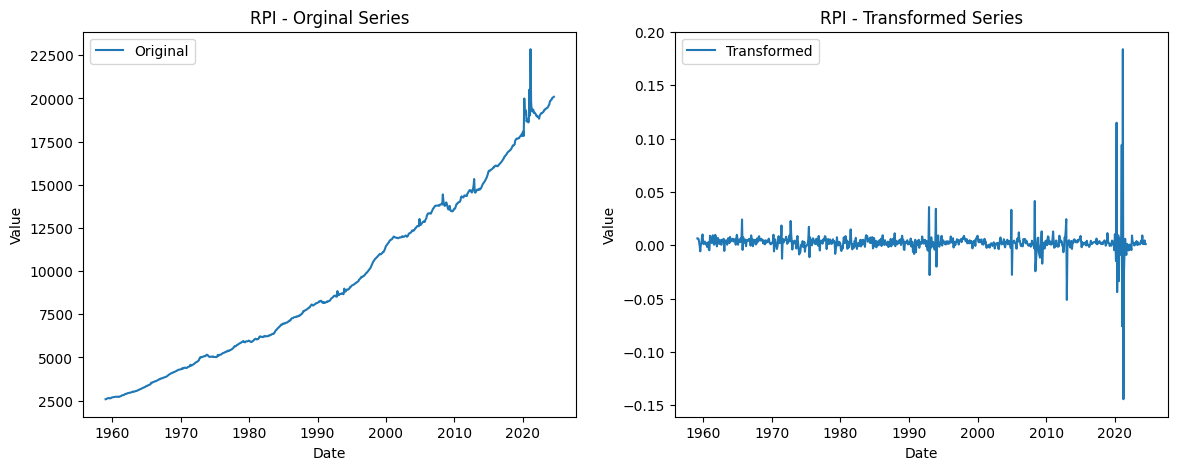

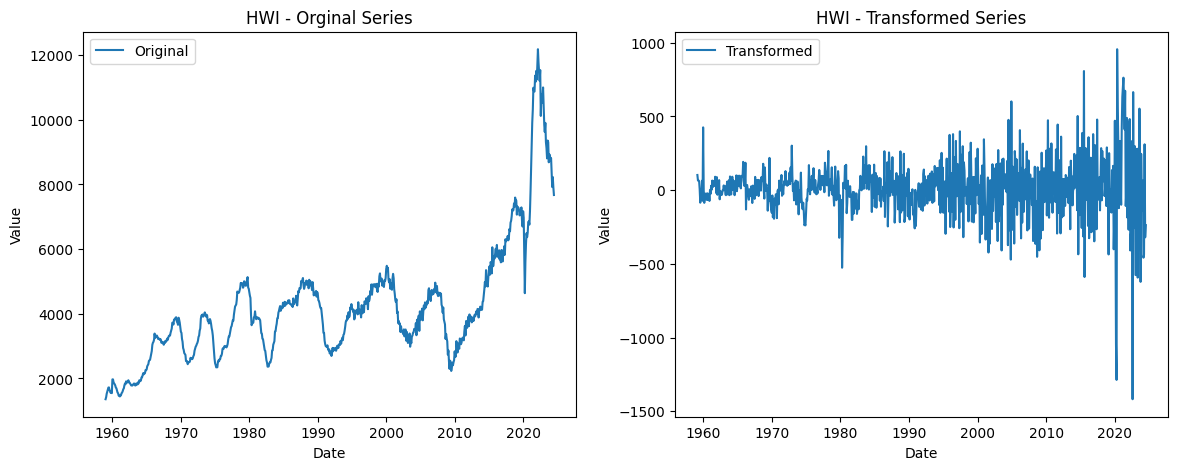

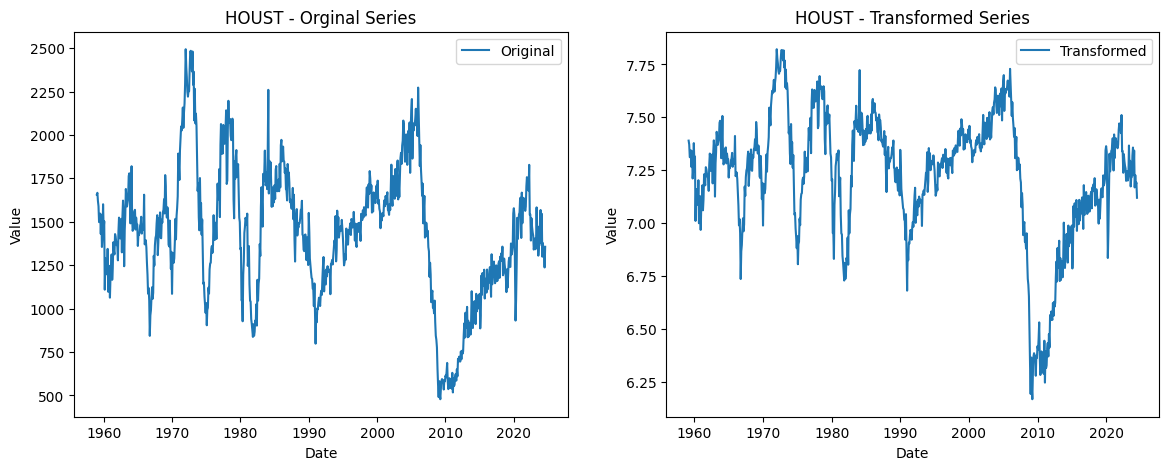

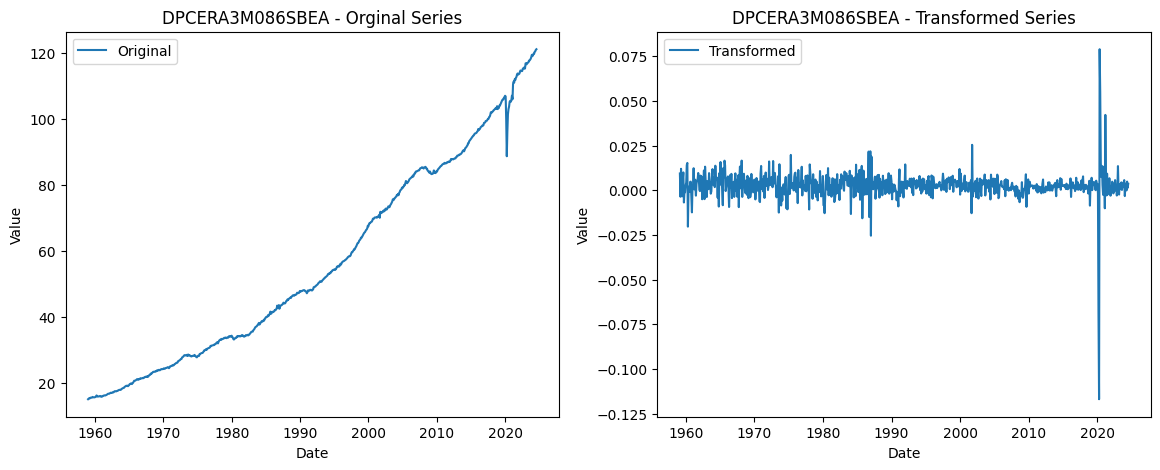

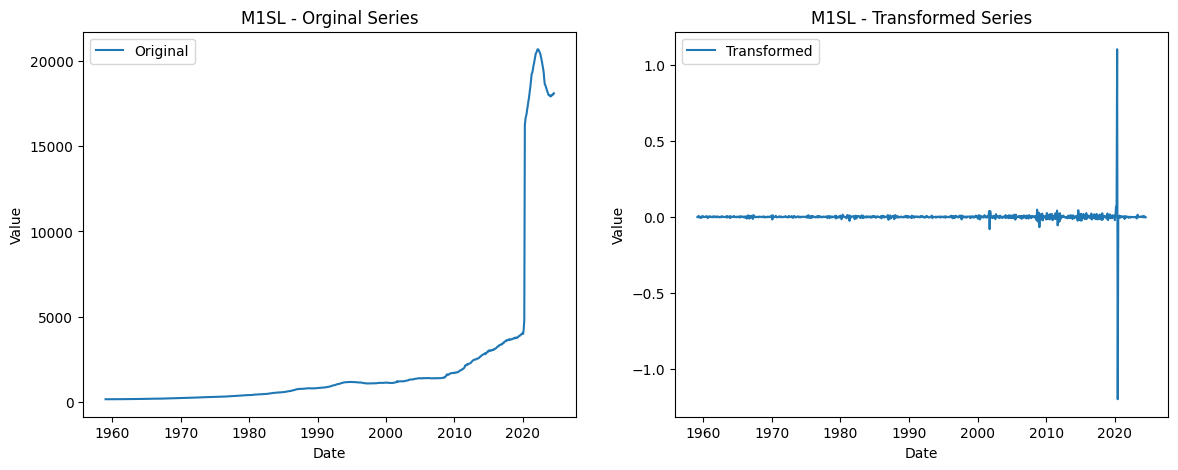

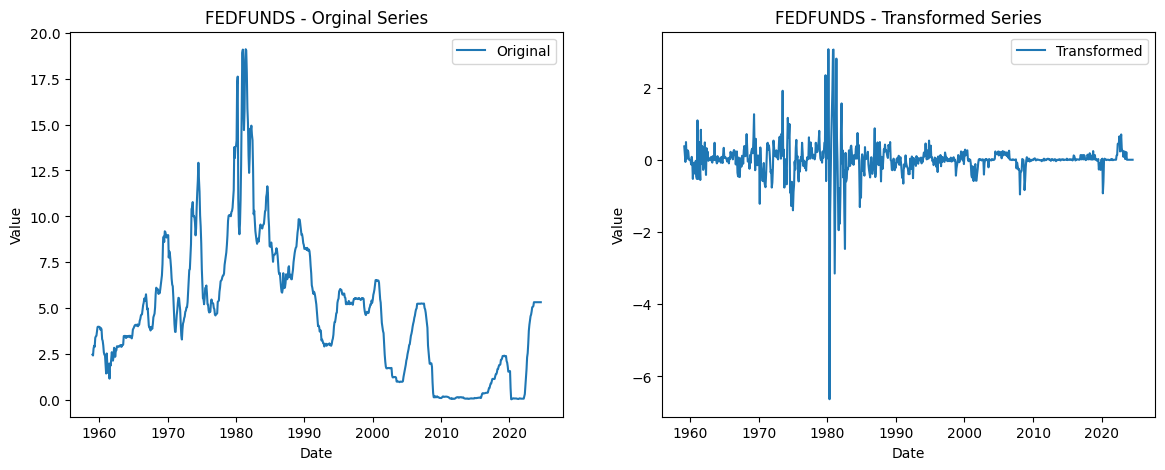

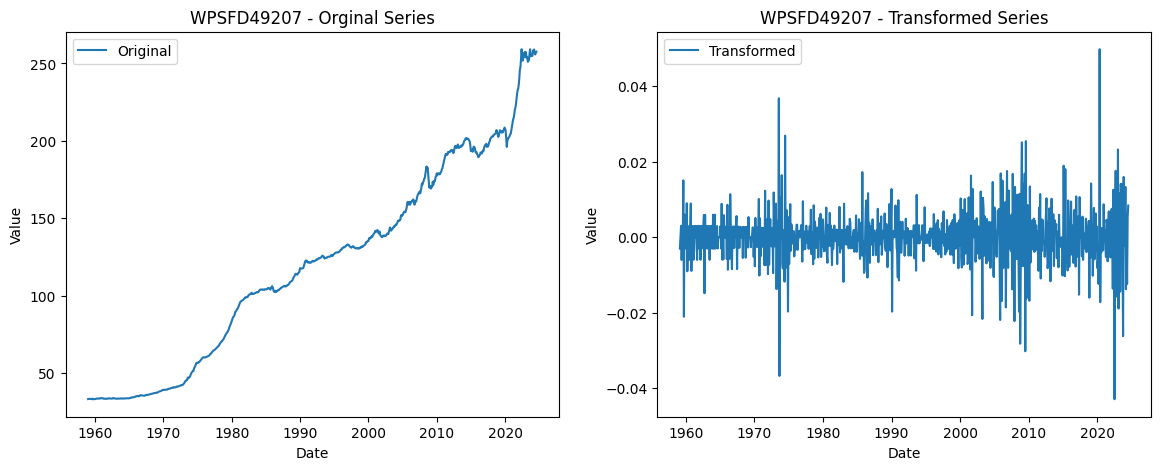

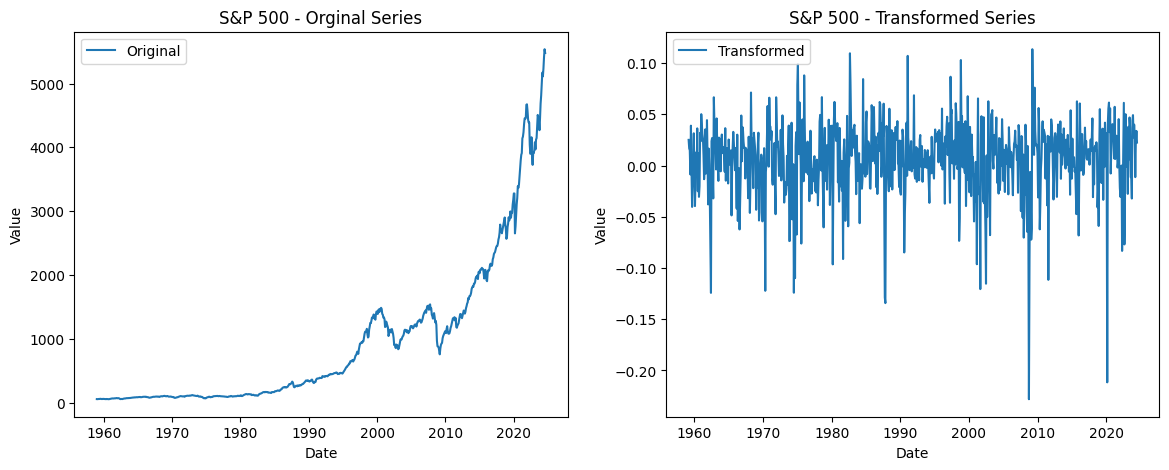

In [ ]:
for variable in df_1.columns:
    fig, axes = plt.subplots(1,2, figsize=(14,5))
    axes[0].plot(df_1.index, df_1[variable], label = "Original")
    axes[0].set_title(f"{variable} - Orginal Series")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Value")
    axes[0].legend()


    axes[1].plot(df_transformed_dropped.index, df_transformed_dropped[variable], label = "Transformed")
    axes[1].set_title(f"{variable} - Transformed Series")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Value")
    axes[1].legend()

All the variable expect for HOUST look stationary as they seem to have a largely constant mean and variance over time, in other words a relatively stable mean and variance over time. However we can see that HOUST is not stationary because the mean and variance seems to change over time and there are some visible trends

### 1b


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


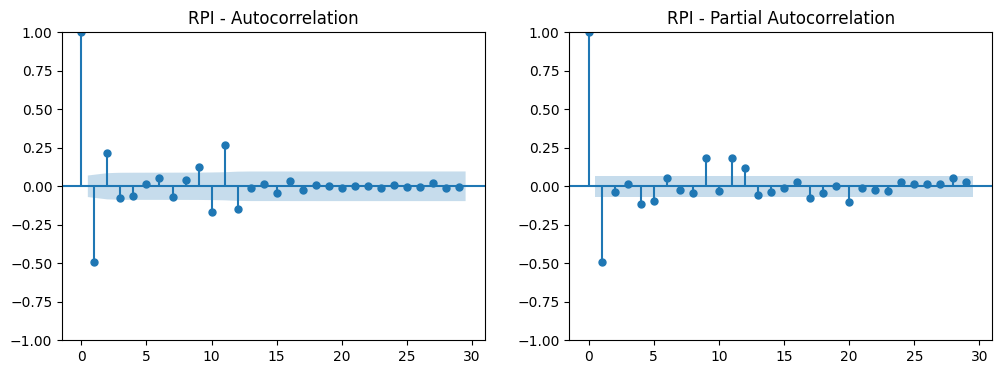

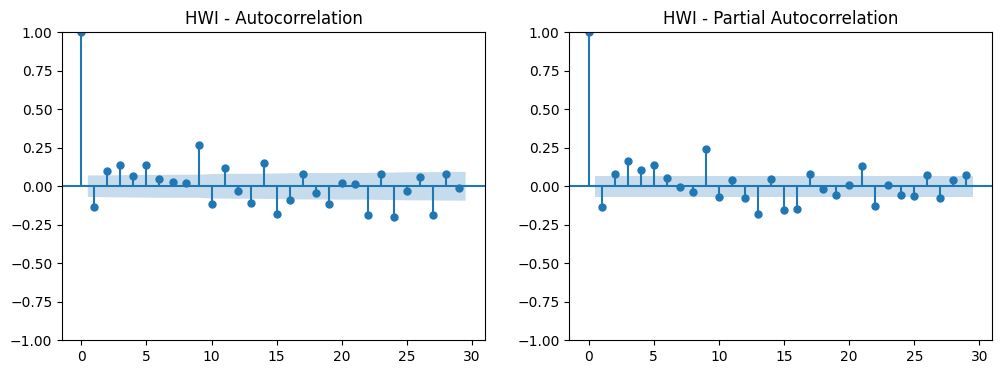

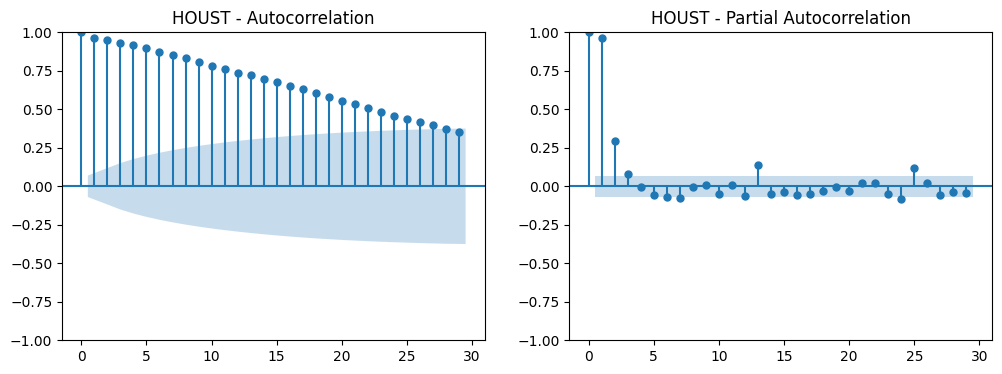

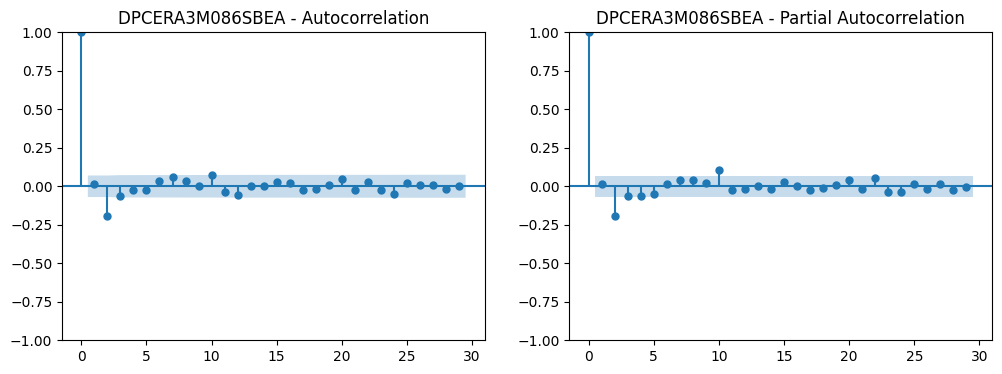

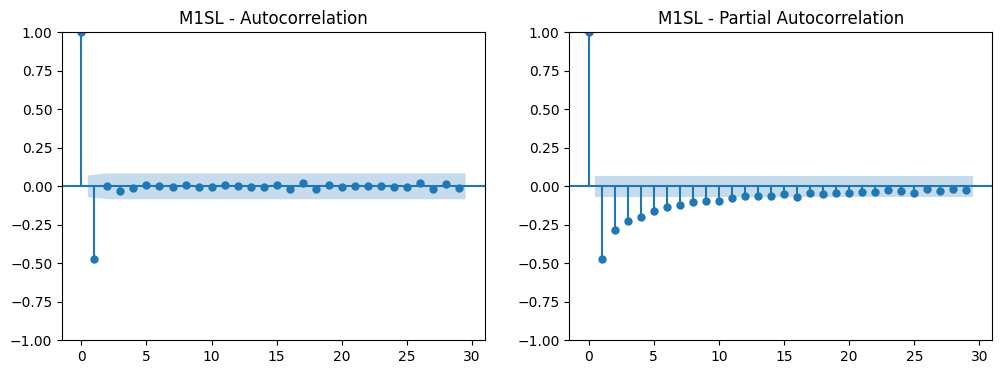

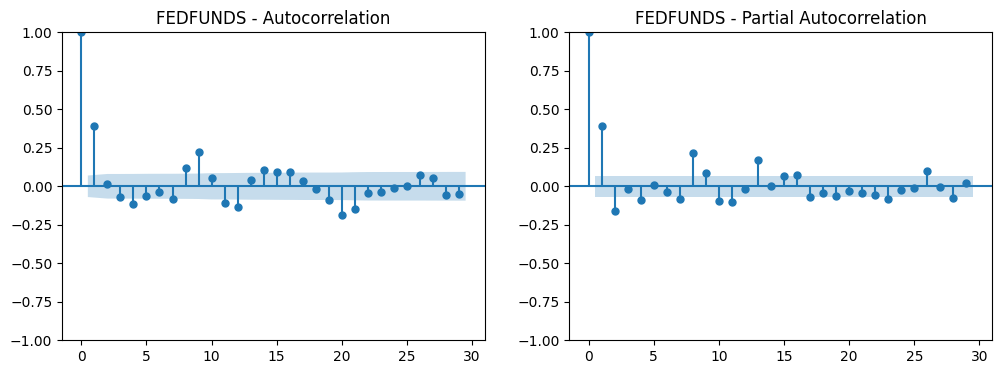

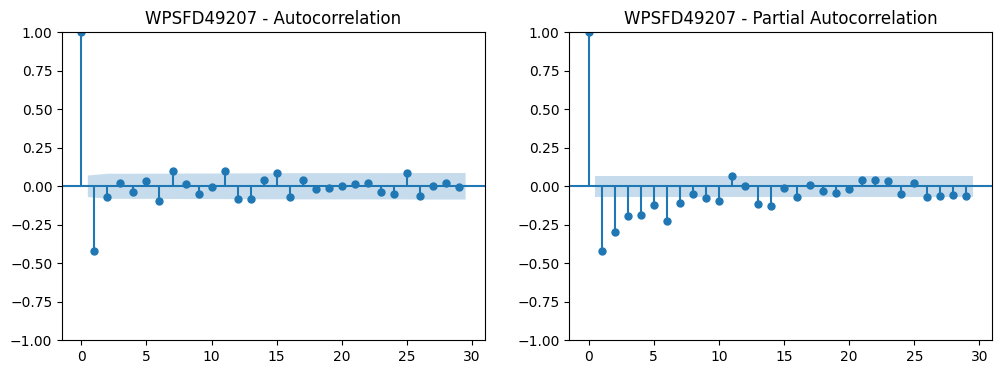

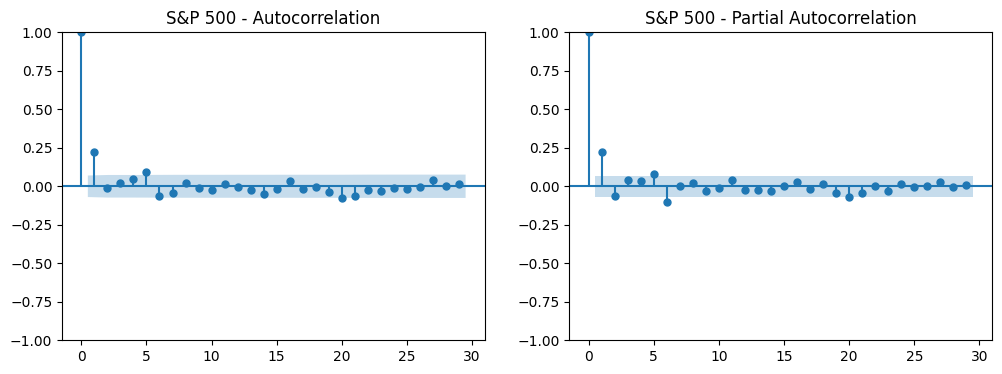

In [ ]:
for variable in df_transformed.columns:
  fig, axes = plt.subplots(1, 2, figsize= (12, 4))
  df_transformed_dropped = df_transformed.dropna()
  plot_acf(df_transformed_dropped[variable], ax= axes[0])
  axes[0].set_title(f"{variable} - Autocorrelation")
  plot_pacf(df_transformed_dropped[variable], ax= axes[1])
  axes[1].set_title(f"{variable} - Partial Autocorrelation")
  plt.tight_layout
  plt.show()

RPI: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 2 we have MA(2) model.

HWI: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 2 we have MA(1) model.

HOUST: Since the ACF plot does decay gradually  it suggest the series is an AR process. Since the PACF plot cuts of after lag 2 we have AR(2) model.

DPCERA3M086SBEA: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 1 we have MA(1) model.

M1SL: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 2 we have MA(2) model.

FEDFUNDS: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 2 we have MA(2) model.

WPSFD49207: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 2 we have MA(2) model.

S&P 500: Since the ACF plot does not decay gradually and instead cuts off sharply(e.g drops to zero after a few lags), it suggest the series needs a Moving Average Process(MA) rather than a AR process. Since the ACF plot cuts of after lag 1 we have MA(1) model.

In [ ]:
df_1.columns

Index(['RPI', 'HWI', 'HOUST', 'DPCERA3M086SBEA', 'M1SL', 'FEDFUNDS',
       'WPSFD49207', 'S&P 500'],
      dtype='object')

### 1c

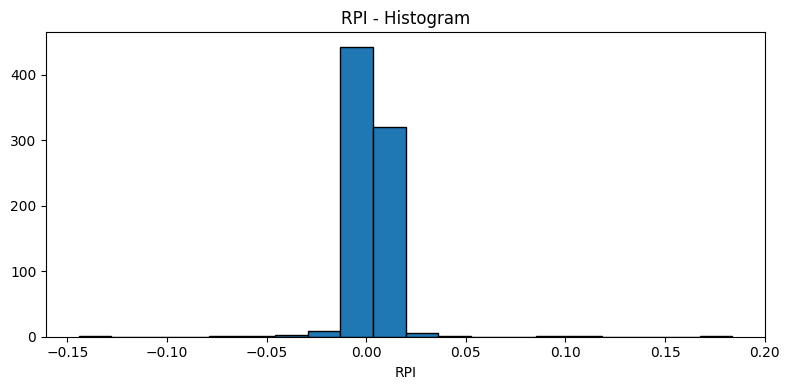

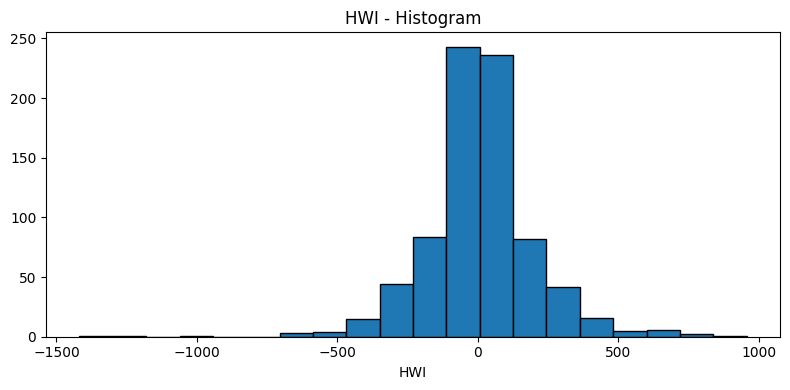

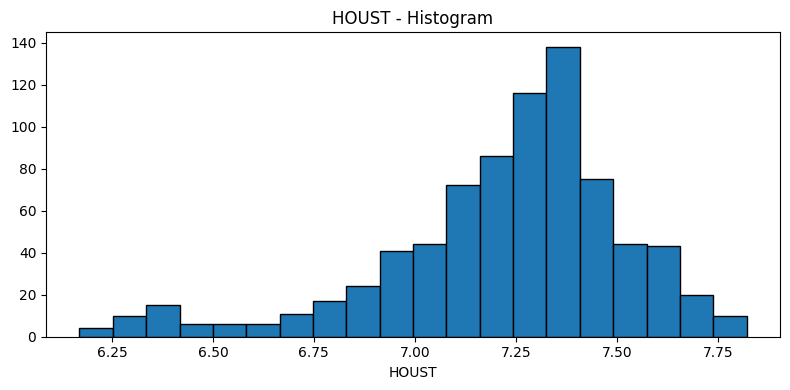

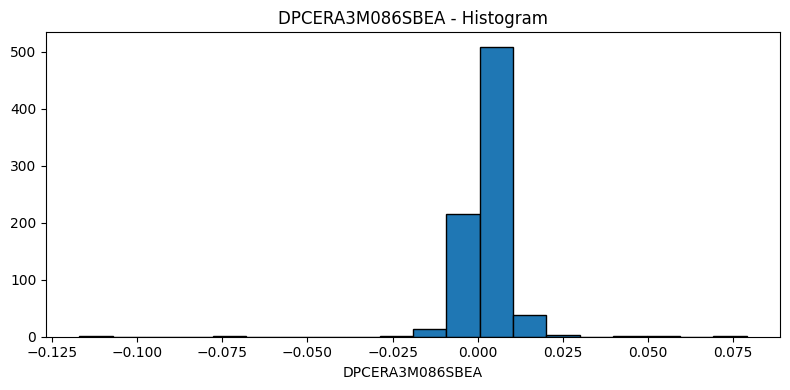

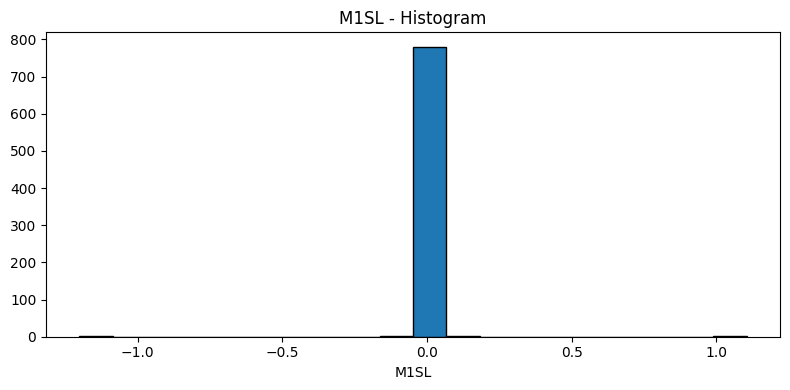

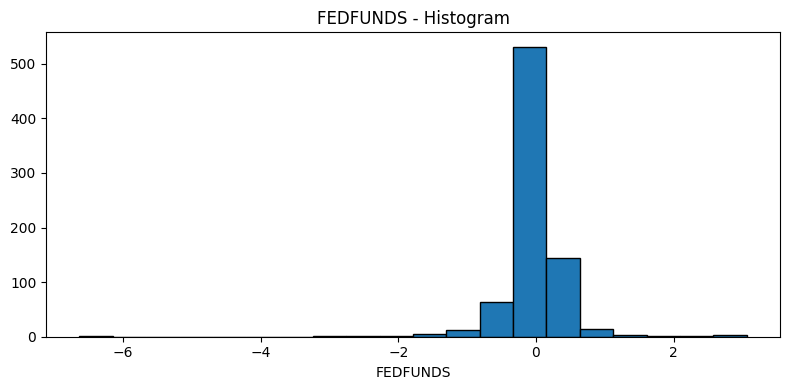

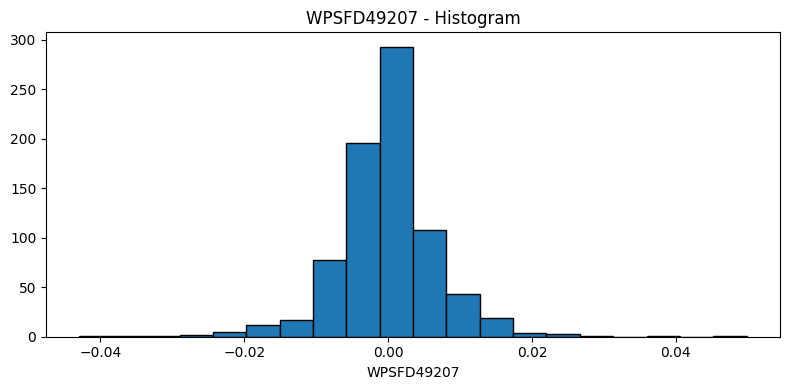

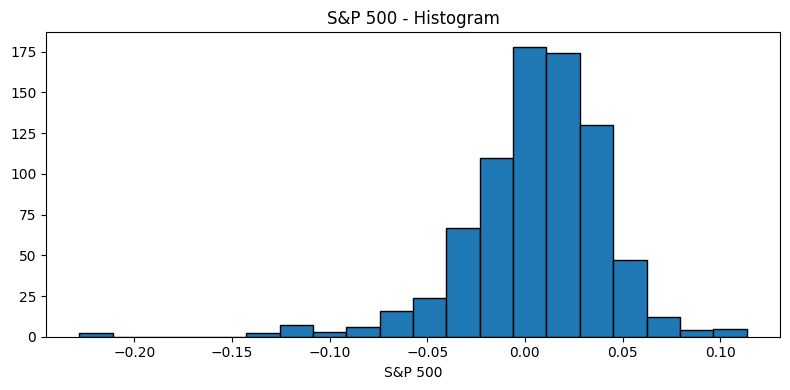

In [ ]:
df_transformed_dropped = df_transformed.dropna()
for variable in df_transformed_dropped.columns:
  fig, axes = plt.subplots(1, 1, figsize= (8,4))
  axes.hist(df_transformed[variable], bins= 20, edgecolor= "black")
  axes.set_title(f"{variable} - Histogram")
  axes.set_xlabel(variable)
  plt.tight_layout()
  plt.show()


RPI:  The histrogram shows a concentration arround the central value, however the distribution has a narrow range, which indicates limited variance. However it is close to normalt distribution.

HW1: The histogram appears largely symmetric and bell-shaped, with little skweness, which means it is largely normally distributed.

HOUST: The histogram appears heavily skewed to the right which means it is likely not normally distributed.

DPCE: While the histogram shows a concentration arround the central value, it does have a narrow range, which indicates a lack of spread in the data, therefore it does not follow a normal distribution.

M1SL: The histogram shows one singal peak around one area(0). Due to this there is a narrow range of values, which means that the variable does not follow a normal distribution.

FEDFUNDS: The histogram is skewed positevly too the right, which suggests it is not normally distributed.

WPSFD49207: The histogram appears largely symmetric and bell-shaped, with little skweness, which means it is largely normally distributed.  

S&P 500: The histogram appears largely symmetric and bell-shaped, with little skweness, which means it is largely normally distributed.  





# Question 2

##2a

In [ ]:
df_transformed.index = pd.to_datetime(df_transformed.index)
df_transformed = df_transformed.asfreq("MS")
import statsmodels.api as sm
def find_best_order(y, pmin=1, pmax=12):
  T = len(y)
  best_p = pmin
  best_bic = float("inf")

  for p in range(pmin, pmax + 1):
    model = sm.tsa.ARIMA(y, order=(p, 0, 0)).fit()
    residuals = model.resid
    sigma_squared = np.mean(residuals**2)
    bic = np.log(sigma_squared) + (p*np.log(T))/T

    if bic < best_bic:
      best_bic = bic
      best_p = p

  return best_p, best_bic




In [ ]:
import warnings
warnings.filterwarnings("ignore")
for variable in df_transformed.columns:
  y = df_transformed[variable].dropna()###Dropping null values
  best_p, best_bic = find_best_order(y)
  print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

Best Orders for RPI: 12 with BIC: -9.173243169826435
Best Orders for HWI: 9 with BIC: 10.541712992610138
Best Orders for HOUST: 2 with BIC: -5.082698807046737
Best Orders for DPCERA3M086SBEA: 2 with BIC: -9.678936603668136
Best Orders for M1SL: 10 with BIC: -6.094521884546265
Best Orders for FEDFUNDS: 11 with BIC: -1.5926516547597942
Best Orders for WPSFD49207: 7 with BIC: -10.21666767504831
Best Orders for S&P 500: 1 with BIC: -6.7047159245682515


### 2b

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def transformations(series, code):
  if code == 1:
    return series
  if code == 2:
    return series.diff()
  if code == 3:
    return series.diff().diff()
  if code == 4:
    return np.log(series)
  if code == 5:
    return np.log(series).diff()
  if code == 6:
    return np.log(series).diff().diff()
  if code == 7:
    return series.pct_change()
  else:
    return series


transformation_codes_1 = df.iloc[0, 1:].to_dict()
#df = df.drop(index= 0)
df.index = pd.to_datetime(df.index)
#df.set_index("sasdate", inplace= True)

df_transformed_1 = pd.DataFrame(index = df.index)

for variable, code in transformation_codes_1.items():
  df_transformed_1[variable] = transformations(df[variable].astype(float), code)



#df_transformed_1.dropna(inplace= True)
df_transformed_1.index = pd.to_datetime(df_transformed_1.index)

df_group1 = df_transformed_1[["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
                          "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222S", "IPFUELS", "CUMFNS"]]

df_group2 = df_transformed_1[["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14",
                     "UEMP15OV", "UEMP15T26", "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001",
                     "USCONS", "MANEMP", "DMANEMP", "NDMANEMP", "SRVPRD", "USTPU", "USWTRADE", "USTRADE",
                     "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN", "CES0600000008",
                     "CES2000000008", "CES3000000008"]]
df_group3 = df_transformed_1[["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW",
                "PERMITS", "PERMITW"]]

df_group4 =  df_transformed_1[["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "ACOGNO", "AMDMNOx",
                                             "ANDENOx", "AMDMUOx", "BUSINVx", "ISRATIOx", "UMCSENTx"]]

df_group5 = df_transformed_1[["M1SL", "M2SL", "M2REAL", "BOGMBASE", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
                         "NONREVSL", "CONSPI", "DTCOLNVHFNM", "DTCTHFNM", "INVEST"]]

df_group6 = df_transformed_1[["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA",
                                    "BAA", "COMPAPFFx", "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM",
                                    "T10YFFM", "AAAFFM", "BAAFFM", "TWEXAFEGSMTHx", "EXSZUSx",
                                    "EXJPUSx", "EXUSUKx", "EXCAUSx"]]

df_group7 =  df_transformed_1[["WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62", "OILPRICEx", "PPICMM", "CPIAUCSL",
               "CPIAPPSL", "CPITRNSL", "CPIMEDSL", "CUSR0000SAC", "CUSR0000SAD", "CUSR0000SAS",
               "CPIULFSL", "CUSR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
               "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]]

df_group8 = df_transformed_1[["S&P 500", "S&P div yield", "S&P PE ratio", "VIXCLSx"]]

dataframes = [df_group1, df_group2, df_group3, df_group4, df_group5, df_group6, df_group7, df_group8]


In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group1.columns:
  best_p, best_bic = find_best_order(df_group1[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 1: {average_order:.2f}")

KeyboardInterrupt: 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group2.columns:
  best_p, best_bic = find_best_order(df_group2[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 2: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group3.columns:
  best_p, best_bic = find_best_order(df_group3[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)


average_order = np.mean(orders)
print(f"Average AR Order for Group 3: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group4.columns:
  best_p, best_bic = find_best_order(df_group4[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 4: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group5.columns:
  best_p, best_bic = find_best_order(df_group5[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 5: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group6.columns:
  best_p, best_bic = find_best_order(df_group6[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 6: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group7.columns:
  best_p, best_bic = find_best_order(df_group7[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 7: {average_order:.2f}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_orders = {}
orders = []
for variable in df_group8.columns:
  best_p, best_bic = find_best_order(df_group8[variable])
  best_orders[variable] = (best_p, best_bic)
  orders.append(best_p)
  #print(f"Best Orders for {variable}: {best_p} with BIC: {best_bic}")

average_order = np.mean(orders)
print(f"Average AR Order for Group 8: {average_order:.2f}")

# Question 3


In [ ]:
df_group1.index = pd.to_datetime(df_group1.index).to_period('M').to_timestamp()
df_group2.index = pd.to_datetime(df_group2.index).to_period('M').to_timestamp()
df_group3.index = pd.to_datetime(df_group2.index).to_period('M').to_timestamp()
df_group4.index = pd.to_datetime(df_group4.index).to_period('M').to_timestamp()
df_group5.index = pd.to_datetime(df_group5.index).to_period('M').to_timestamp()
df_group6.index = pd.to_datetime(df_group6.index).to_period('M').to_timestamp()
df_group7.index = pd.to_datetime(df_group7.index).to_period('M').to_timestamp()
df_group8.index = pd.to_datetime(df_group8.index).to_period('M').to_timestamp()

df_group1 = df_group1.dropna()
df_group2 = df_group2.dropna()
df_group3 = df_group3.dropna()
df_group4 = df_group4.dropna()
df_group5 = df_group5.dropna()
df_group6 = df_group6.dropna()
df_group7 = df_group7.dropna()
df_group8 = df_group8.dropna()

# Display the cleaned DataFrame


### 3a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg


df_transformed.index = pd.to_datetime(df_transformed.index)
df_transformed = df_transformed.asfreq("MS")


def find_best_order_autoreg(y, pmin=1, pmax=12):
  T = len(y)
  best_p = pmin
  best_bic = float("inf")

  for p in range(pmin, pmax + 1):
    try:
        model = AutoReg(y, lags=p).fit()
        bic = model.bic

        if bic < best_bic:
          best_bic = bic
          best_p = p
    except:
      continue

  return best_p, best_bic



window_size = 492
def rolling_window_analysis(dataframe):
    forecast_dates = []
    avg_orders = []

    for start in range(len(dataframe) - window_size):
        end = start + window_size
        window_data = dataframe.iloc[start:end]
        forecast_date = dataframe.index[end]  # Date of the forecast


        group_orders = []

        for variable in dataframe.columns:
            y = window_data[variable]
            y = y.dropna()
            if len(y) >= window_size:
                best_p = find_best_order_autoreg(y)
                group_orders.append(best_p)

        if group_orders:
            avg_order = np.mean(group_orders)
            avg_orders.append(avg_order)
            forecast_dates.append(forecast_date)

    plt.figure(figsize = (10,6))
    plt.plot(forecast_dates, avg_orders)
    plt.show()

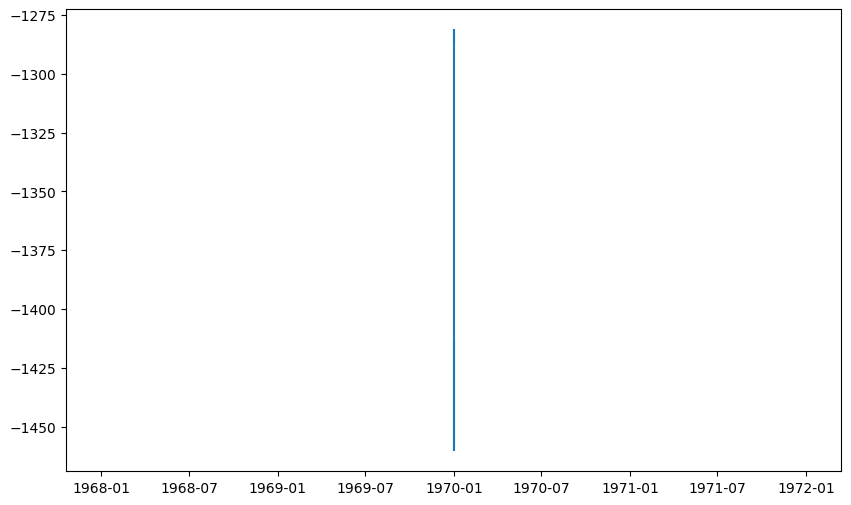

In [ ]:
rolling_window_analysis(df_group1)

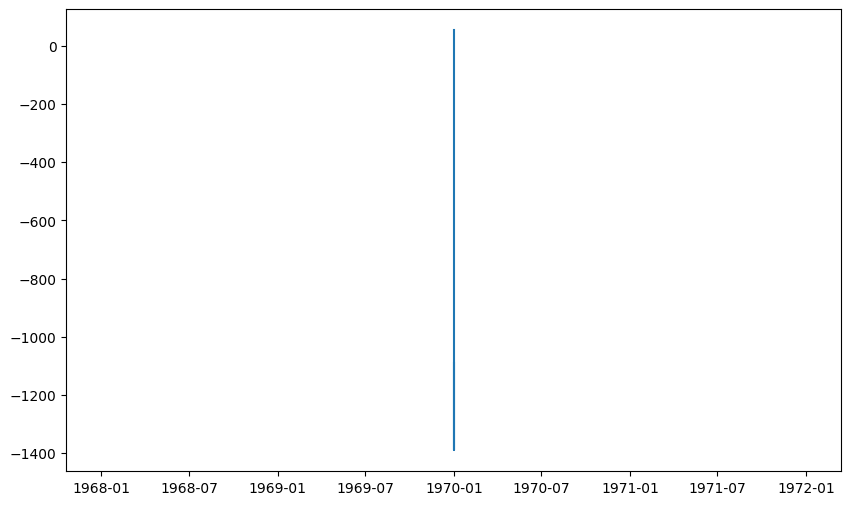

In [ ]:
rolling_window_analysis(df_group2)

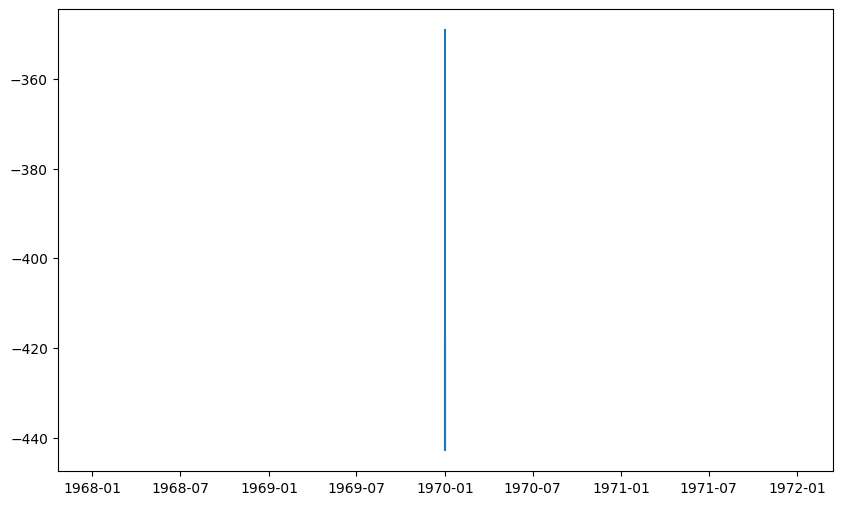

In [ ]:
rolling_window_analysis(df_group3)

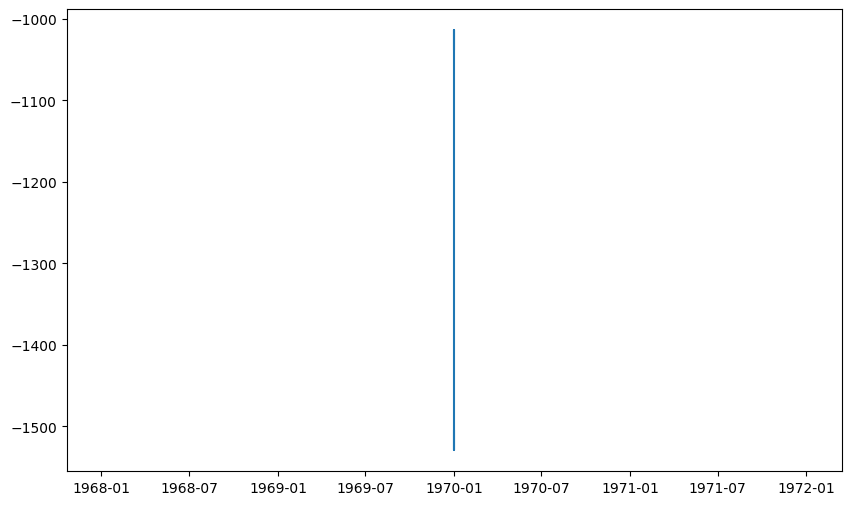

In [ ]:
rolling_window_analysis(df_group4)

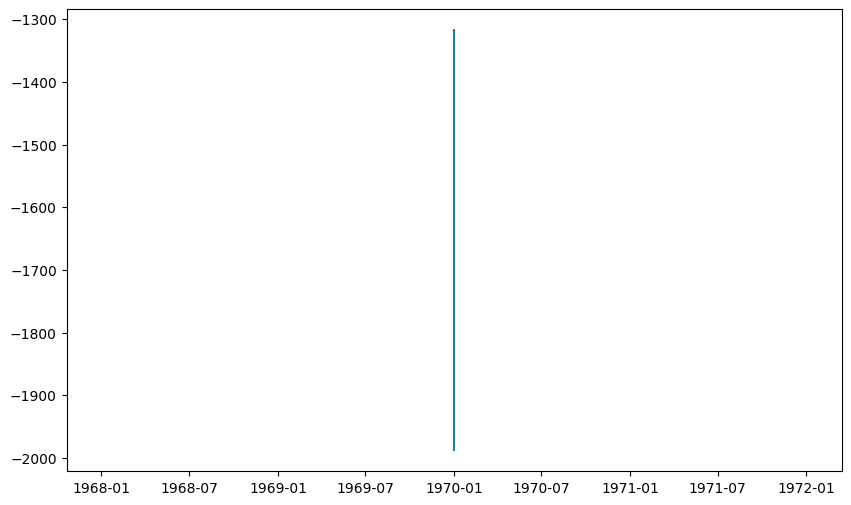

In [ ]:
rolling_window_analysis(df_group5)

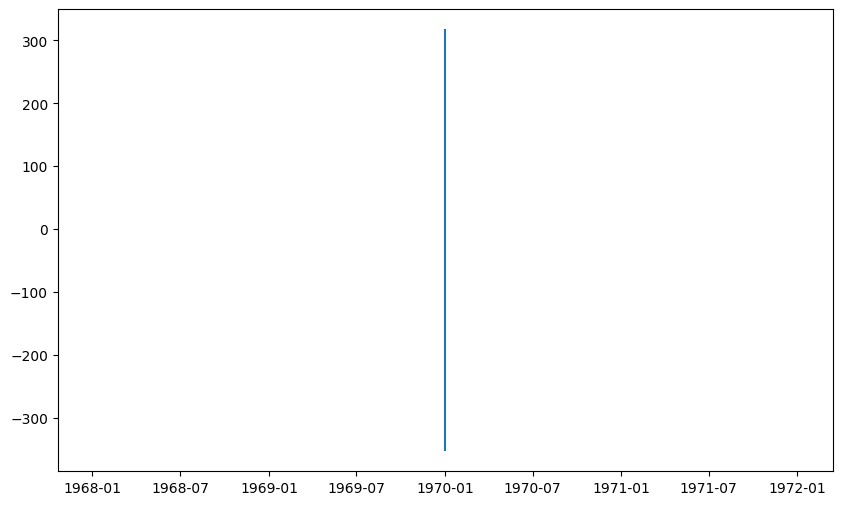

In [ ]:
rolling_window_analysis(df_group6)

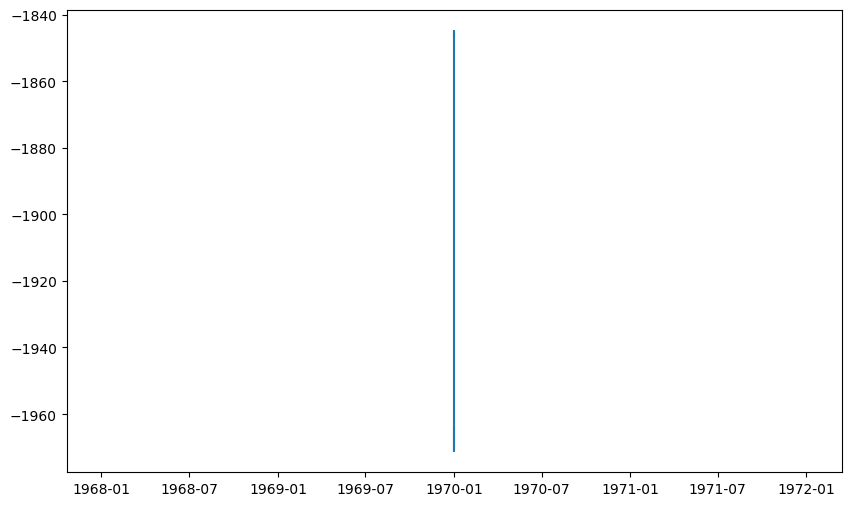

In [ ]:
rolling_window_analysis(df_group7)

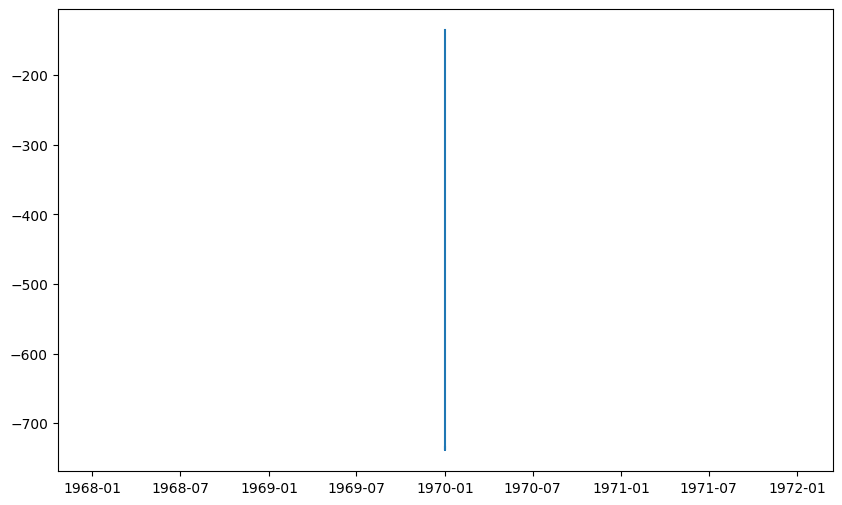

In [ ]:
rolling_window_analysis(df_group8)

### 2b


In [ ]:
window_size = 492

def rolling_window_mse(dataframe):
    mse_values_by_group = {variable: [] for variable in dataframe.columns}

    for start in range(len(dataframe) - window_size):
        end = start + window_size
        window_data = dataframe.iloc[start:end]
        actual_data = dataframe.iloc[end]

        for variable in dataframe.columns:
            y = window_data[variable].dropna()
            if len(y) >= window_size:
                best_p = find_best_order_autoreg(y)
                best_p = int(best_p)
                model = AutoReg(y, lags=best_p).fit()

                forecast = model.predict(start=len(y), end=len(y))

                mse = (forecast.iloc[0] - actual_data[variable]) ** 2
                mse_values_by_group[variable].append(mse)

    avg_mse_by_group = {variable: np.mean(mse_values) for variable, mse_values in mse_values_by_group.items()}
    std_mse_by_group = {variable: np.std(mse_values) for variable, mse_values in mse_values_by_group.items()}

    return avg_mse_by_group, std_mse_by_group


In [ ]:
#df_group1.dropna(inplace=True)
mean_mse, std_mse = rolling_window_mse(df_group1)
#print(f"Mean MSE: {mean_mse:.6f}")
#print(f"Std Dev MSE: {std_mse:.6f}")


TypeError: lags must be integer_like (int or np.integer, but not bool or timedelta64)

### 2c

In [ ]:
import pandas as pd

window_size = 492
split_date = "2020-01-01"
def rolling_window_mse_split_autoreg(dataframe):
    mse_values_by_group_before_2020 = {variable: [] for variable in dataframe.columns}
    mse_values_by_group_after_2020 = {variable: [] for variable in dataframe.columns}

    for start in range(len(dataframe) - window_size):
      end = start + window_size
      window_data = dataframe.iloc[start:end]
      forecast_date = dataframe.index[end]
      actual_data = dataframe.iloc[end]

      for variable in dataframe.columns:
            y = window_data[variable]
            y = y.dropna()
            if len(y) >= window_size:
                best_p, _ = find_best_order_autoreg(y)
                #best_p = max(1, int(best_p))
                model = AutoReg(y, lags=best_p).fit()

                forecast = model.predict(start = len(y), end = len(y))

                mse = (forecast.iloc[0] - actual_data[variable]) **2
                if forecast_date < pd.to_datetime(split_date):
                  mse_values_by_group_before_2020[variable].append(mse)
                else:
                  mse_values_by_group_after_2020[variable].append(mse)


      avg_mse_by_group_before_2020 = {variable: np.mean(mse_values) for variable, mse_values in mse_values_by_group_before_2020.items()}
      avg_mse_by_group_after_2020 = {variable: np.mean(mse_values) for variable, mse_values in mse_values_by_group_after_2020.items()}
      std_mse_by_group_before_2020 = {variable: np.std(mse_values) for variable, mse_values in mse_values_by_group_before_2020.items()}
      std_mse_by_group_after_2020 = {variable: np.std(mse_values) for variable, mse_values in mse_values_by_group_after_2020.items()}
      return avg_mse_by_group_before_2020, avg_mse_by_group_after_2020, std_mse_by_group_before_2020, std_mse_by_group_after_2020

avg_mse_before_2020, std_mse_before_2020, avg_mse_after_2020, std_mse_after_2020 = rolling_window_mse_split_autoreg(df_group1)


print("Average MSE Before 2020:", avg_mse_before_2020)
print("Standard Deviation MSE Before 2020:", std_mse_before_2020)
print("Average MSE After 2020:", avg_mse_after_2020)
print("Standard Deviation MSE After 2020:", std_mse_after_2020)


Average MSE Before 2020: {'RPI': 3.516228283959779e-05, 'W875RX1': 4.640538167034311e-05, 'INDPRO': 3.0266867216946594e-05, 'IPFPNSS': 3.6504405968659495e-05, 'IPFINAL': 5.935391371940431e-05, 'IPCONGD': 0.00024699298736724154, 'IPDCONGD': 0.00020696606402451472, 'IPNCONGD': 0.0006402301249382393, 'IPBUSEQ': 0.00010476746982003442, 'IPMAT': 6.059931265831644e-06, 'IPDMAT': 6.0504594631874084e-05, 'IPNMAT': 0.00019483851238174594, 'IPMANSICS': 1.934098329576814e-05, 'IPB51222S': 0.00044039062547948513, 'IPFUELS': 0.0010071925989443978, 'CUMFNS': 0.13747251632242558}
Standard Deviation MSE Before 2020: {'RPI': nan, 'W875RX1': nan, 'INDPRO': nan, 'IPFPNSS': nan, 'IPFINAL': nan, 'IPCONGD': nan, 'IPDCONGD': nan, 'IPNCONGD': nan, 'IPBUSEQ': nan, 'IPMAT': nan, 'IPDMAT': nan, 'IPNMAT': nan, 'IPMANSICS': nan, 'IPB51222S': nan, 'IPFUELS': nan, 'CUMFNS': nan}
Average MSE After 2020: {'RPI': 0.0, 'W875RX1': 0.0, 'INDPRO': 0.0, 'IPFPNSS': 0.0, 'IPFINAL': 0.0, 'IPCONGD': 0.0, 'IPDCONGD': 0.0, 'IPNCO

,RPI,W875RX1,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS
1970-01-01,6.247486,6.184561,1.479858,1.542734,1.493443,1.845818,1.332355,2.032077,0.476706,1.387883,0.874385,1.813557,1.427076,1.382151,1.935695,78.1973
1970-01-01,0.003877,0.003621,0.019395,0.013405,0.008628,0.007309,0.005232,0.009512,0.013296,0.031179,0.045029,0.017359,0.018213,-0.002725,-0.013715,1.2455
1970-01-01,0.006457,0.007325,0.014300,0.006036,0.004896,0.000000,0.019397,-0.004745,0.010749,0.025643,0.038641,0.014909,0.015523,0.006799,0.025001,1.0341
1970-01-01,0.006510,0.007029,0.021080,0.014339,0.014545,0.015652,0.006379,0.016510,0.025798,0.027244,0.029656,0.030503,0.021106,0.004057,-0.004500,1.5153
1970-01-01,0.005796,0.006618,0.014954,0.008267,0.009580,0.004766,0.020152,0.000000,0.031889,0.025430,0.034050,0.008944,0.013822,0.014732,-0.019352,0.9237
